<a href="https://www.kaggle.com/code/raman2000/sales-report-analysis?scriptVersionId=102010782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../input/stores-area-and-sales-data/Stores.csv")
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
df.corr

<bound method DataFrame.corr of      Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 colum

In [7]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

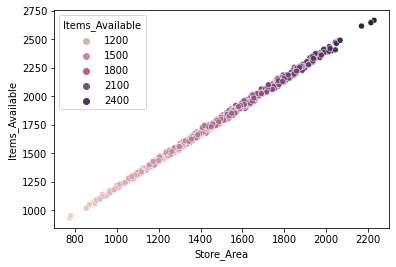

In [8]:
sns.scatterplot(x="Store_Area",y="Items_Available",
                data=df,hue="Items_Available")


Text(0.5, 1.0, 'Sales correlation')

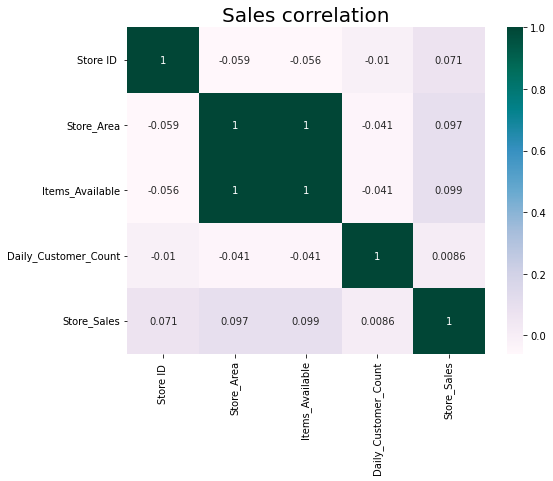

In [9]:
plt.figure(figsize=(8,6))
hm=sns.heatmap(df.corr(),cmap="PuBuGn",annot=True)
hm.set_title('Sales correlation', fontdict={'fontsize':20})

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

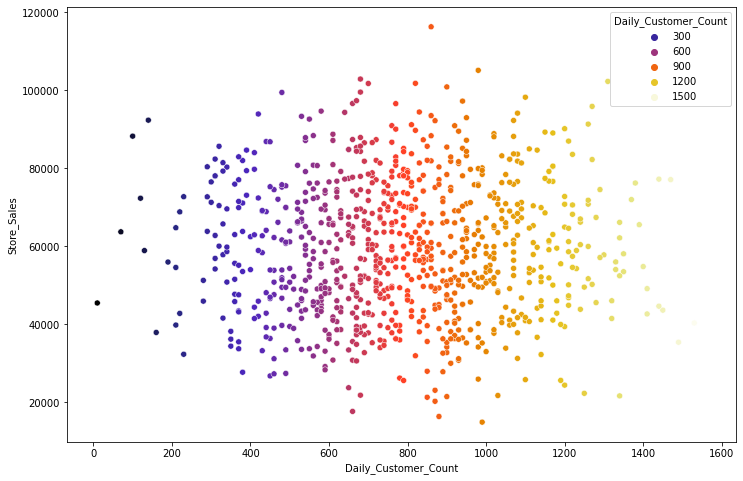

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Daily_Customer_Count",y="Store_Sales",
                data=df,hue="Daily_Customer_Count",size_order="Store_Sales",palette="CMRmap",)

In [11]:
df1=df.mean()
df1=df[["Items_Available","Store_Sales","Daily_Customer_Count"]].mean()
df1.mean(axis=0)
df1

Items_Available          1782.035714
Store_Sales             59351.305804
Daily_Customer_Count      786.350446
dtype: float64

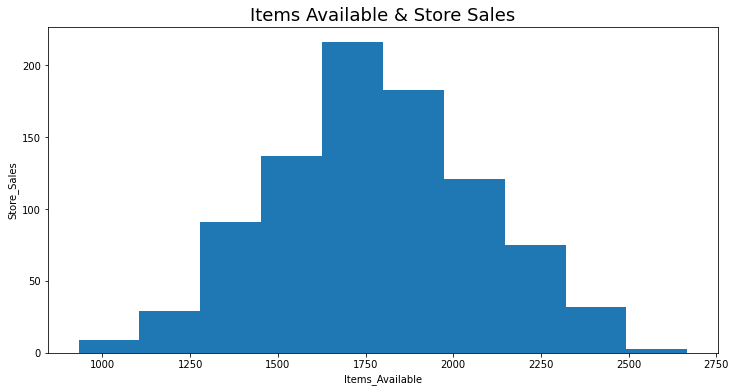

In [12]:
plt.figure(figsize=(12,6))
plt.hist(df["Items_Available"])
plt.xlabel("Items_Available")
plt.ylabel("Store_Sales")
plt.title("Items Available & Store Sales",
          fontdict={'fontsize':18})
plt.show()

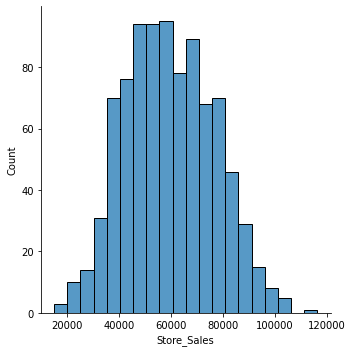

In [13]:
sns.displot(df.Store_Sales,palette="CMRmap",)

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

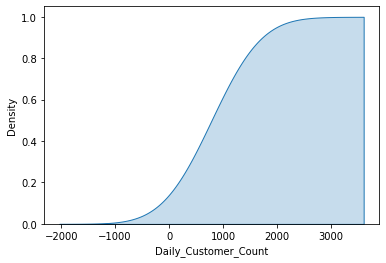

In [14]:
sns.kdeplot(df.Daily_Customer_Count,bw_adjust=10,
            shade=True,cumulative=True)

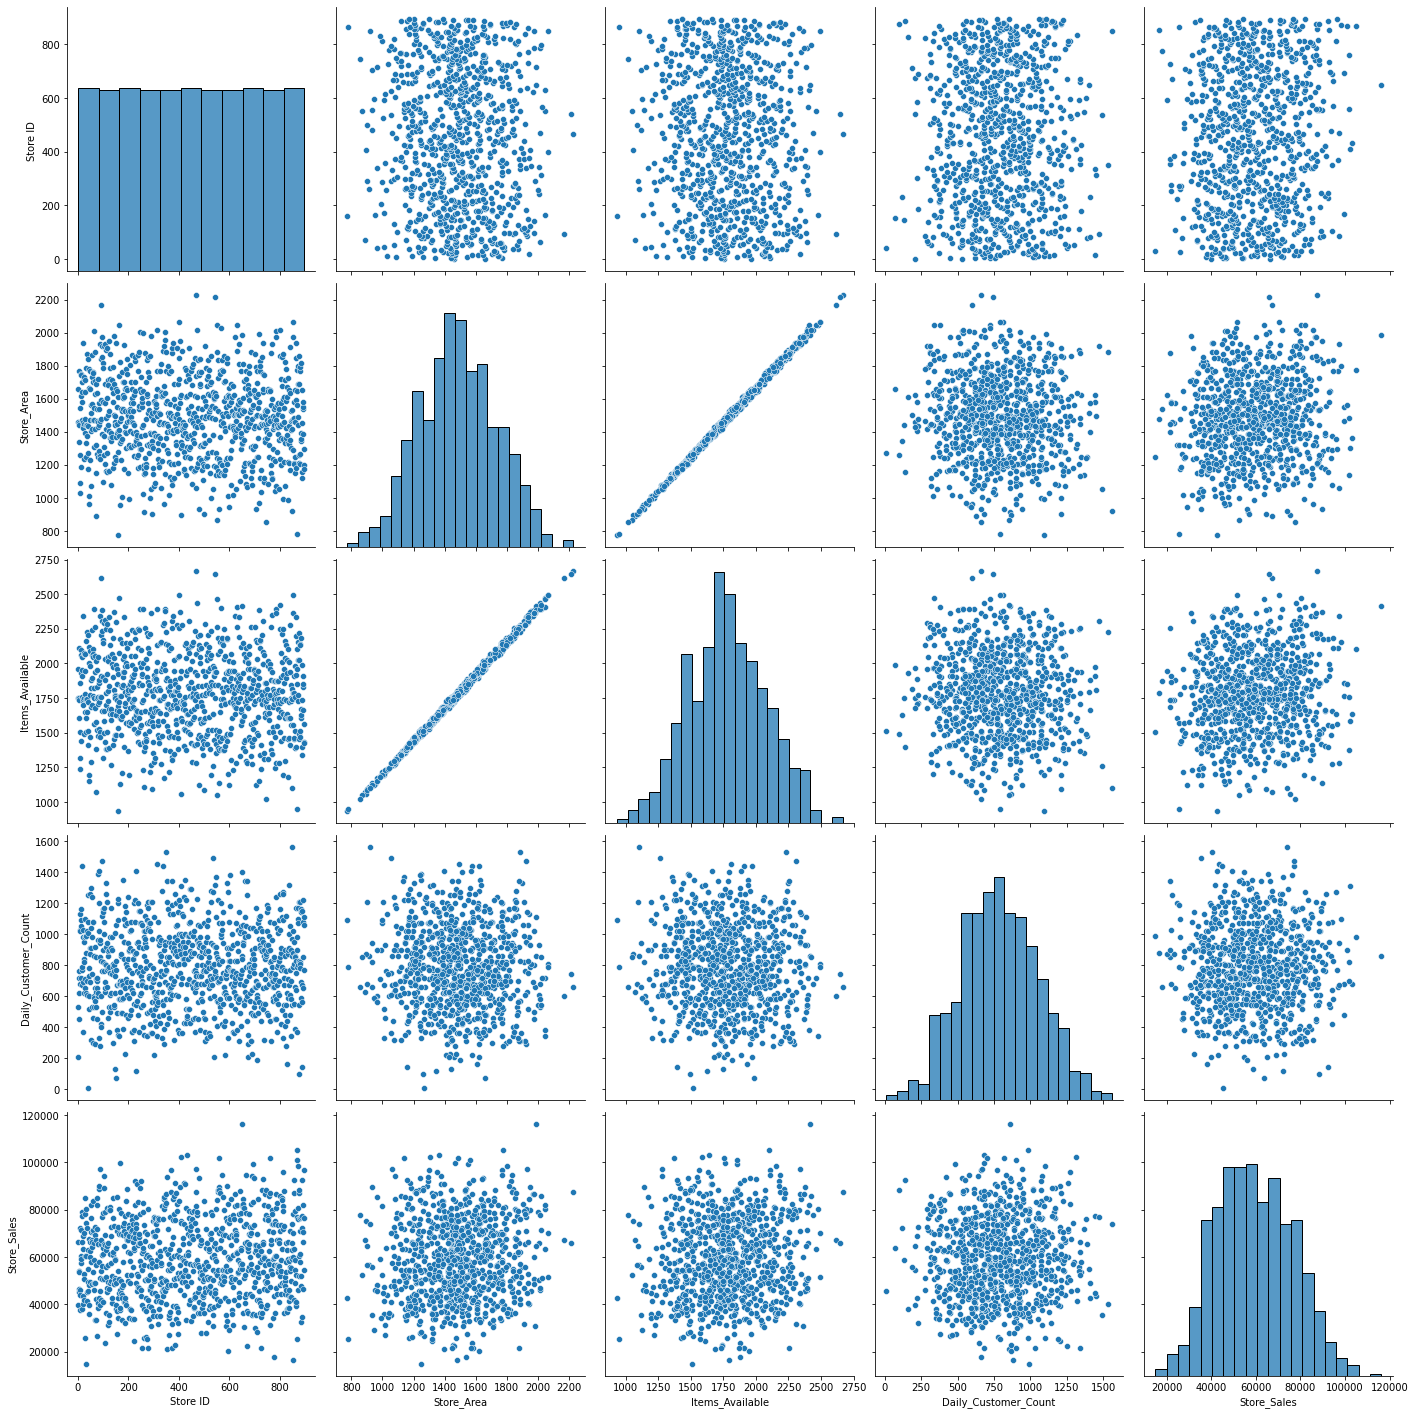

In [15]:
sns.pairplot(df,height=4,palette="tab10")